In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [2]:
file = 'Data/Bala.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('--- File downloaded ---')
else:
    print('--- File found ---')
    Path_ = file

--- File found ---


In [3]:
Data = pd.read_csv(Path_,sep=',')
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [4]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [5]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
        
    return prod

In [6]:
def Poly(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [7]:
x = np.linspace(1,6,100)
y = Poly(x,X,Y)

<IPython.core.display.Javascript object>


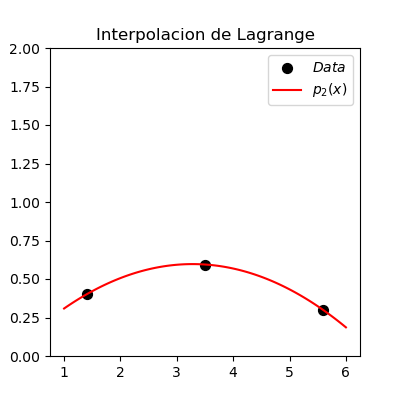

In [8]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0.,2.)
ax.scatter(X,Y,color='k',s=50,label=r'$Data$')
plt.plot(x,y,linewidth=1.5,color='r',label=r'$p_{2}(x)$')
plt.title('Interpolacion de Lagrange')
plt.legend(loc=0)


In [9]:
x  = sym.Symbol('x')
f = Poly(x,X,Y)
f

0.400795493181974*(1.33333333333333 - 0.238095238095238*x)*(1.66666666666667 - 0.476190476190476*x) + 0.594128102489774*(2.66666666666667 - 0.476190476190476*x)*(0.476190476190476*x - 0.666666666666667) + 0.298027955239382*(0.238095238095238*x - 0.333333333333333)*(0.476190476190476*x - 1.66666666666667)

In [10]:
f = sym.expand(f)
f

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

In [11]:
lineal = sym.lambdify([x],f.args[1],'numpy')
b = lineal(1)

In [12]:
quad = sym.lambdify([x],f.args[2],'numpy')
a = quad(1)

In [13]:
theta = np.arctan(b)
print(theta)
theta*180/np.pi

0.3490658503988656


19.999999999999986

In [14]:
v = np.sqrt( -9.8/(2*np.cos(theta)**2*a) )
v

10.0